In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [6]:
diabetes  = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
diabetes.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### DATA CLEANING

In [7]:
null_columns =diabetes.columns[diabetes.isna().any()].tolist()
print(null_columns)

[]


### Visualization

C:\Users\LENOVE\AppData\Local\Temp\ipykernel_17748\2048626171.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_binary', data=diabetes, palette='Set1')


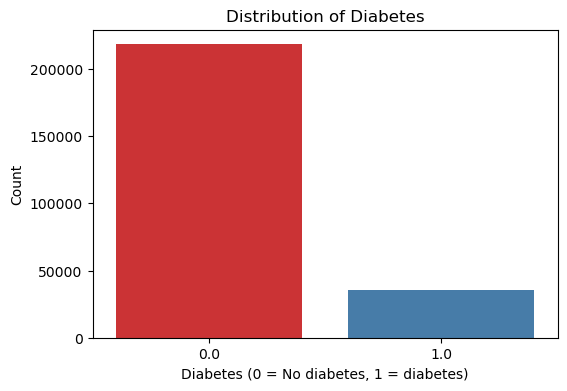

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_binary', data=diabetes, palette='Set1')
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes (0 = No diabetes, 1 = diabetes)')
plt.ylabel('Count')
plt.show()

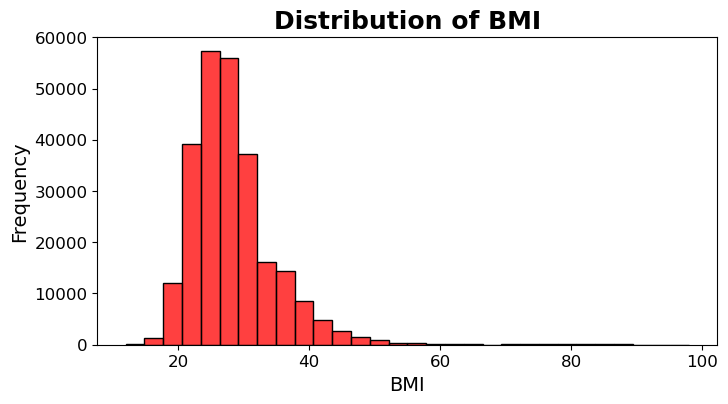

In [28]:

plt.figure(figsize=(8, 4))
sns.histplot(diabetes['BMI'], bins=30, color='red', edgecolor='black')
plt.title('Distribution of BMI', fontsize=18, fontweight='bold')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


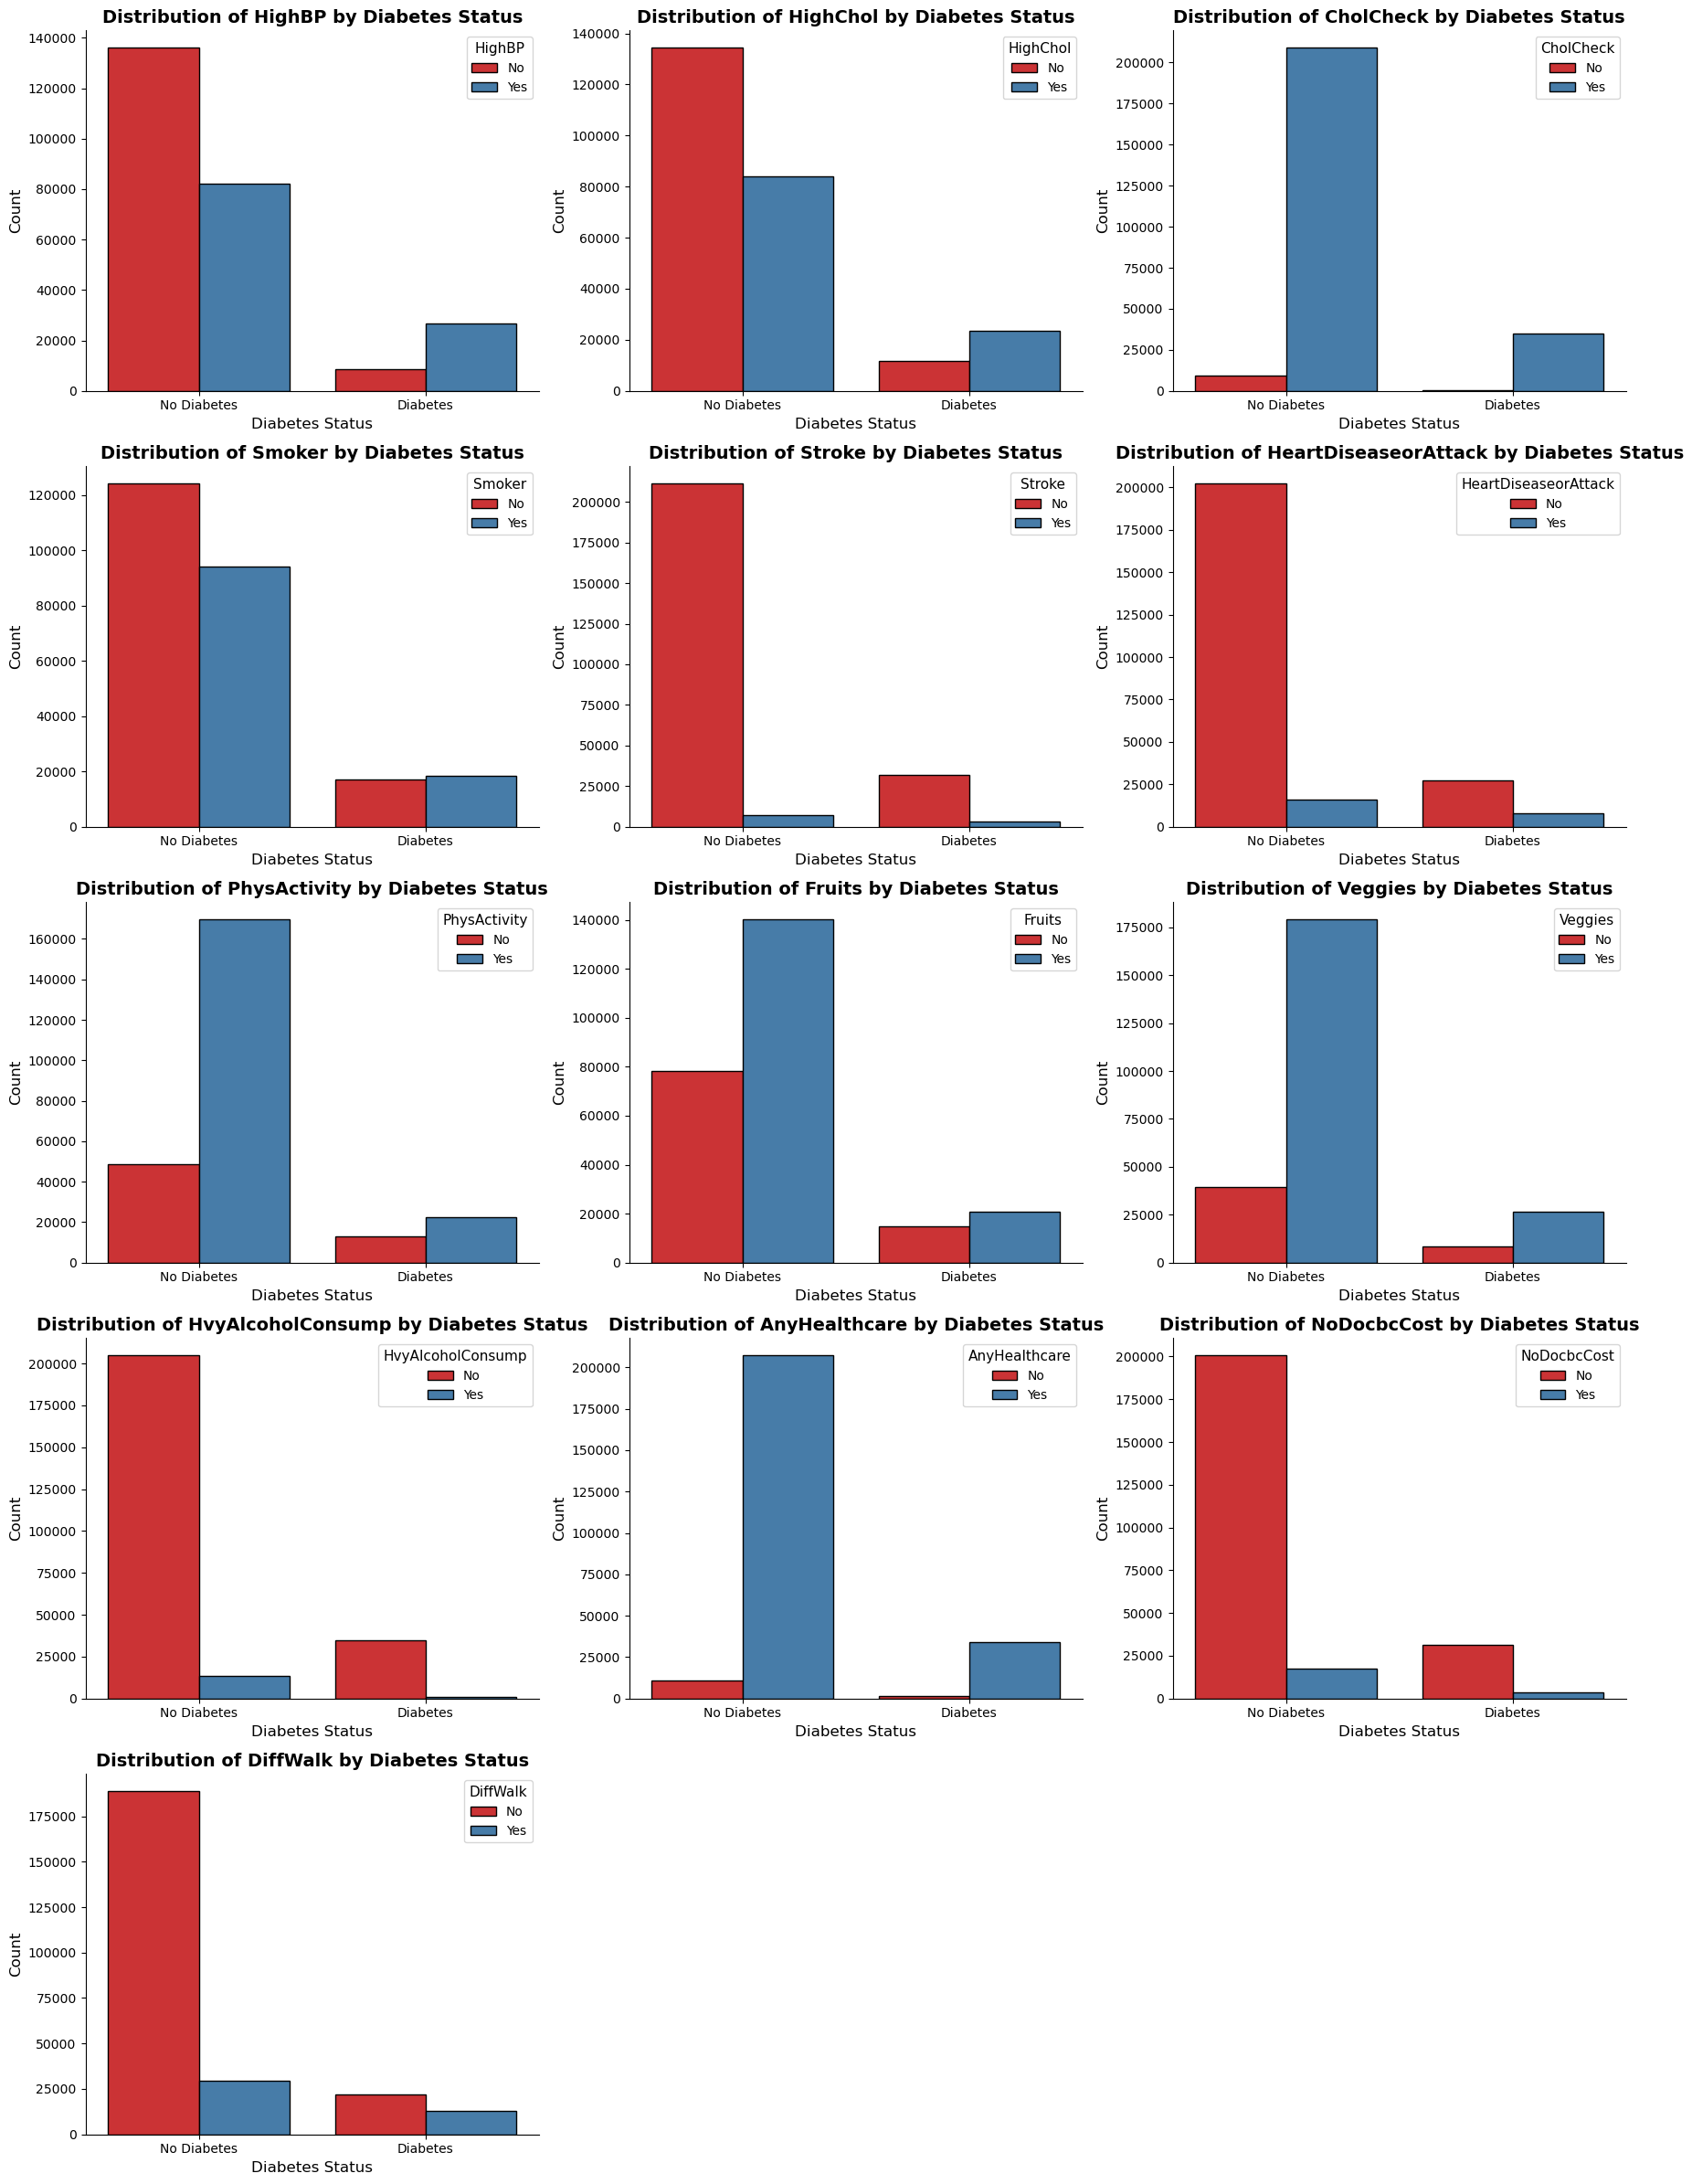

In [ ]:


binary_cols = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk'
]

plt.figure(figsize=(18, 24))
n_rows, n_cols = 5, 3

for idx, col in enumerate(binary_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.countplot(x='Diabetes_binary', hue=col, data=diabetes, palette='Set1', edgecolor='black')

    plt.title(f'Distribution of {col} by Diabetes Status', fontsize=14, fontweight='bold')
    plt.xlabel('Diabetes Status', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], fontsize=10)
    plt.legend(title=col, labels=['No', 'Yes'], fontsize=10, title_fontsize=11)

plt.tight_layout()
sns.despine()
plt.show()


C:\Users\LENOVE\AppData\Local\Temp\ipykernel_17748\2181498189.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Excellent (1)', 'Very Good (2)', 'Good (3)', 'Fair (4)', 'Poor (5)'], rotation=45)
C:\Users\LENOVE\AppData\Local\Temp\ipykernel_17748\2181498189.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([
C:\Users\LENOVE\AppData\Local\Temp\ipykernel_17748\2181498189.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([


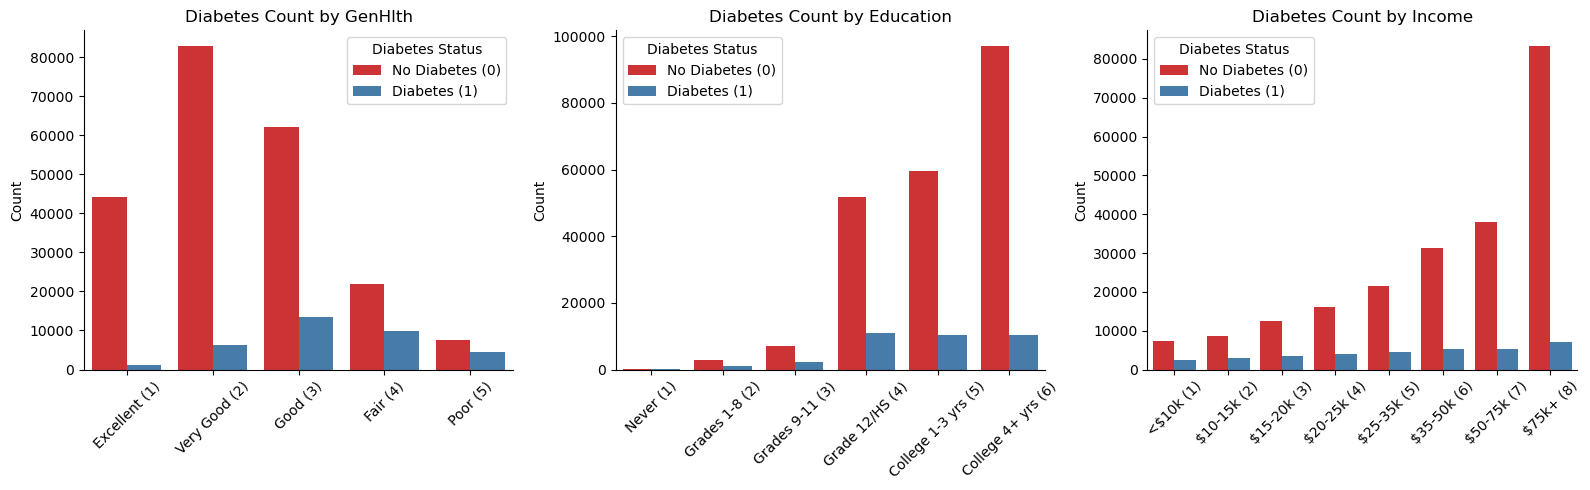

In [36]:
numeric_cols = ['GenHlth', 'Education', 'Income']
plt.figure(figsize=(16, 5))
for i, feature in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    ax = sns.countplot(
        x=feature,
        hue='Diabetes_binary',
        data=diabetes,
        palette='Set1',
        order=sorted(diabetes[feature].unique())
    )
    plt.title(f'Diabetes Count by {feature}')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.legend(title='Diabetes Status', 
              labels=['No Diabetes (0)', 'Diabetes (1)'])
    
    if feature == 'GenHlth':
        ax.set_xticklabels(['Excellent (1)', 'Very Good (2)', 'Good (3)', 'Fair (4)', 'Poor (5)'], rotation=45)
    elif feature == 'Education':
        ax.set_xticklabels([
            'Never (1)', 'Grades 1-8 (2)', 'Grades 9-11 (3)', 
            'Grade 12/HS (4)', 'College 1-3 yrs (5)', 'College 4+ yrs (6)'
        ], rotation=45)
    elif feature == 'Income':
        ax.set_xticklabels([
            '<$10k (1)', '$10-15k (2)', '$15-20k (3)', '$20-25k (4)',
            '$25-35k (5)', '$35-50k (6)', '$50-75k (7)', '$75k+ (8)'
        ], rotation=45)
        
    plt.tight_layout()
    sns.despine()
plt.show()

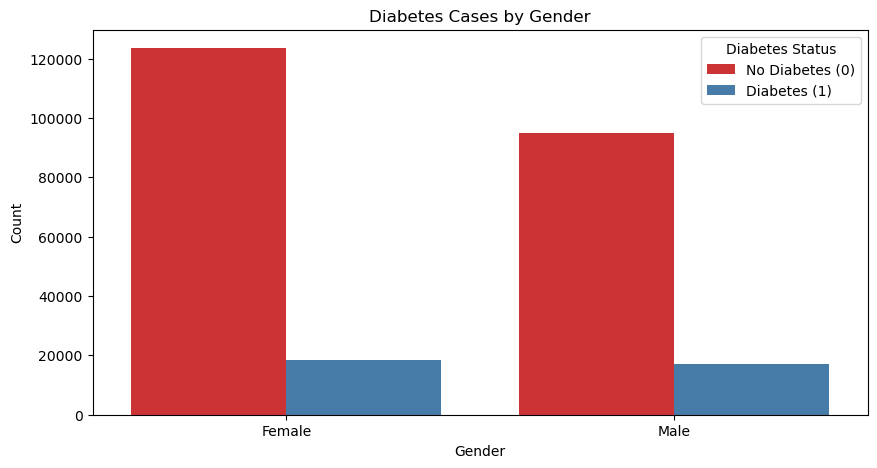

Total counts by gender:
Sex
0.0    141974
1.0    111706
Name: count, dtype: int64


In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', hue='Diabetes_binary', data=diabetes, palette='Set1')
plt.title('Diabetes Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.xticks([0, 1], ['Female', 'Male']) 
plt.show()
gender_counts = diabetes['Sex'].value_counts()
print("Total counts by gender:")
print(gender_counts)

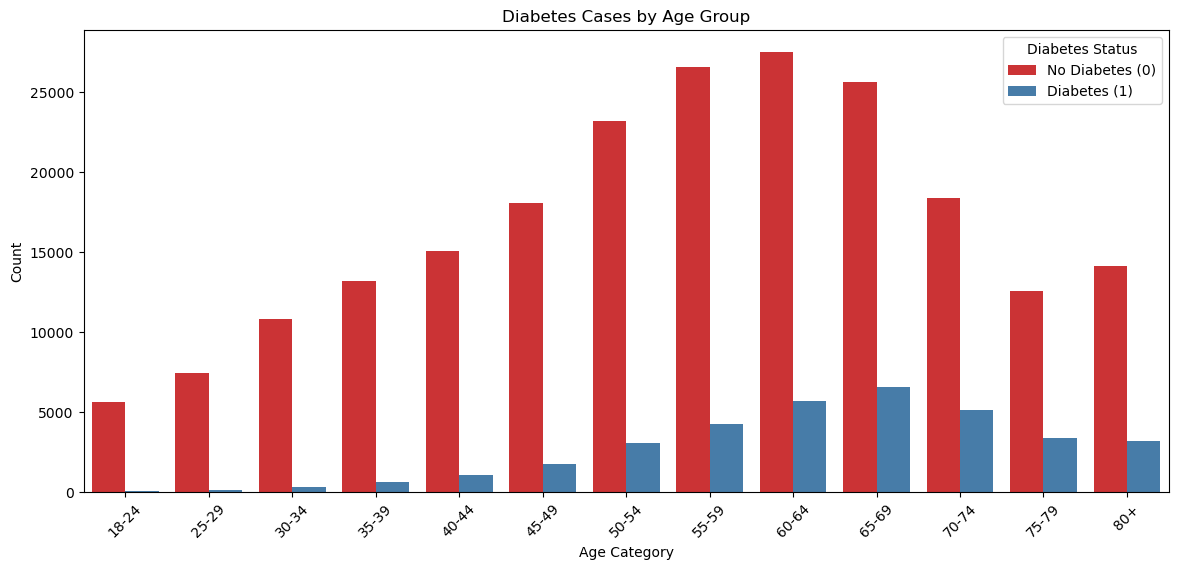

In [13]:
age_labels = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69', 
    11: '70-74', 12: '75-79', 13: '80+'
}

plt.figure(figsize=(14, 6))
sns.countplot(
    x='Age', 
    hue='Diabetes_binary', 
    data=diabetes, 
    palette='Set1'
)
plt.title('Diabetes Cases by Age Group')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.xticks(ticks=range(13), labels=age_labels.values(), rotation=45)
plt.show()

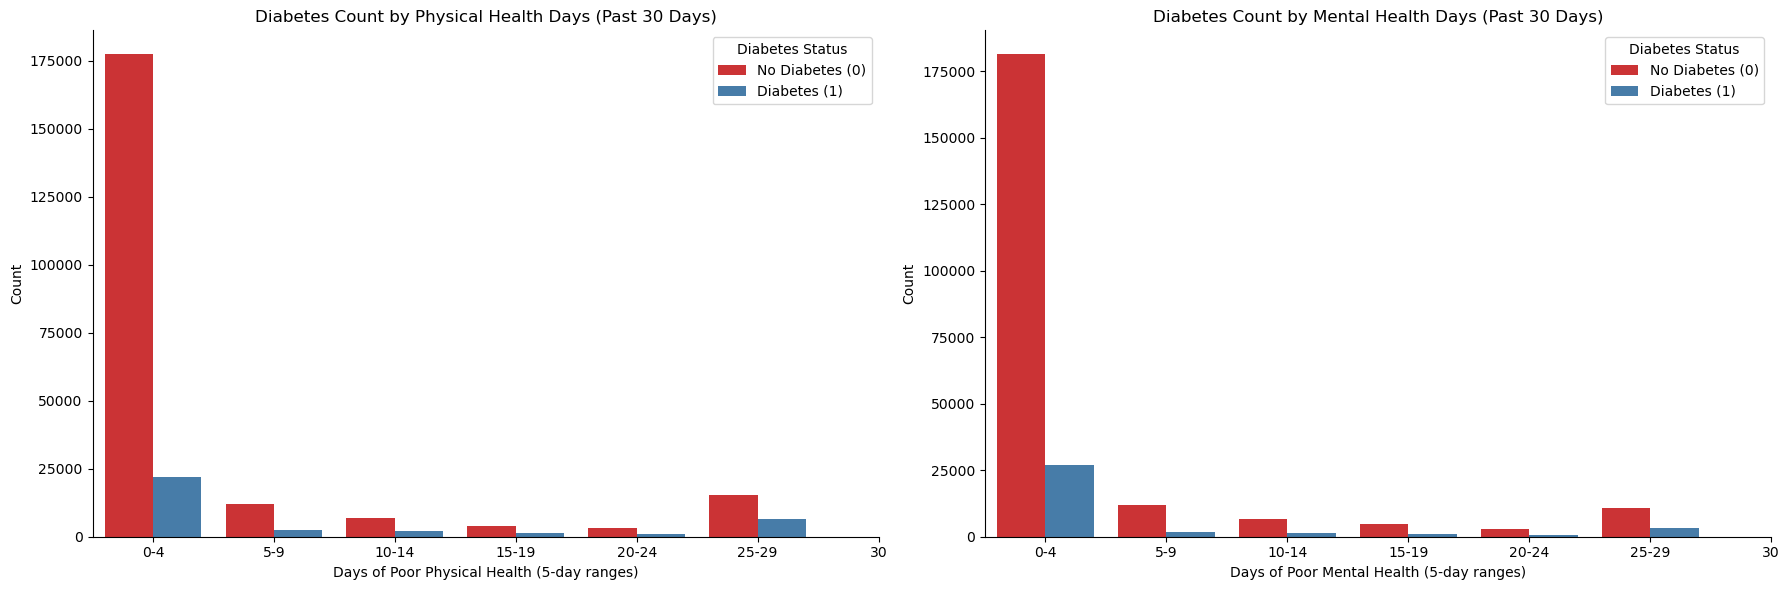

In [38]:
bins = np.arange(0, 31, 5) 
labels = [f"{i}-{i+4}" for i in bins[:-2]] + ['25-29', '30']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(
    x=np.digitize(diabetes['PhysHlth'], bins=bins[:-1], right=False),
    hue='Diabetes_binary',
    data=diabetes,
    palette='Set1',
    ax=ax1
)
ax1.set_title('Diabetes Count by Physical Health Days (Past 30 Days)')
ax1.set_xlabel('Days of Poor Physical Health (5-day ranges)')
ax1.set_ylabel('Count')
ax1.set_xticks(range(len(labels)))
ax1.set_xticklabels(labels)
ax1.legend(
    title='Diabetes Status',
    labels=['No Diabetes (0)',  'Diabetes (1)']
)
sns.countplot(
    x=np.digitize(diabetes['MentHlth'], bins=bins[:-1], right=False),
    hue='Diabetes_binary',
    data=diabetes,
    palette='Set1',
    ax=ax2
)
ax2.set_title('Diabetes Count by Mental Health Days (Past 30 Days)')
ax2.set_xlabel('Days of Poor Mental Health (5-day ranges)')
ax2.set_ylabel('Count')
ax2.set_xticks(range(len(labels)))
ax2.set_xticklabels(labels)
ax2.legend(
    title='Diabetes Status',
    labels=['No Diabetes (0)', 'Diabetes (1)']
)

plt.tight_layout()
sns.despine()
plt.show()

### Correlation Matrix

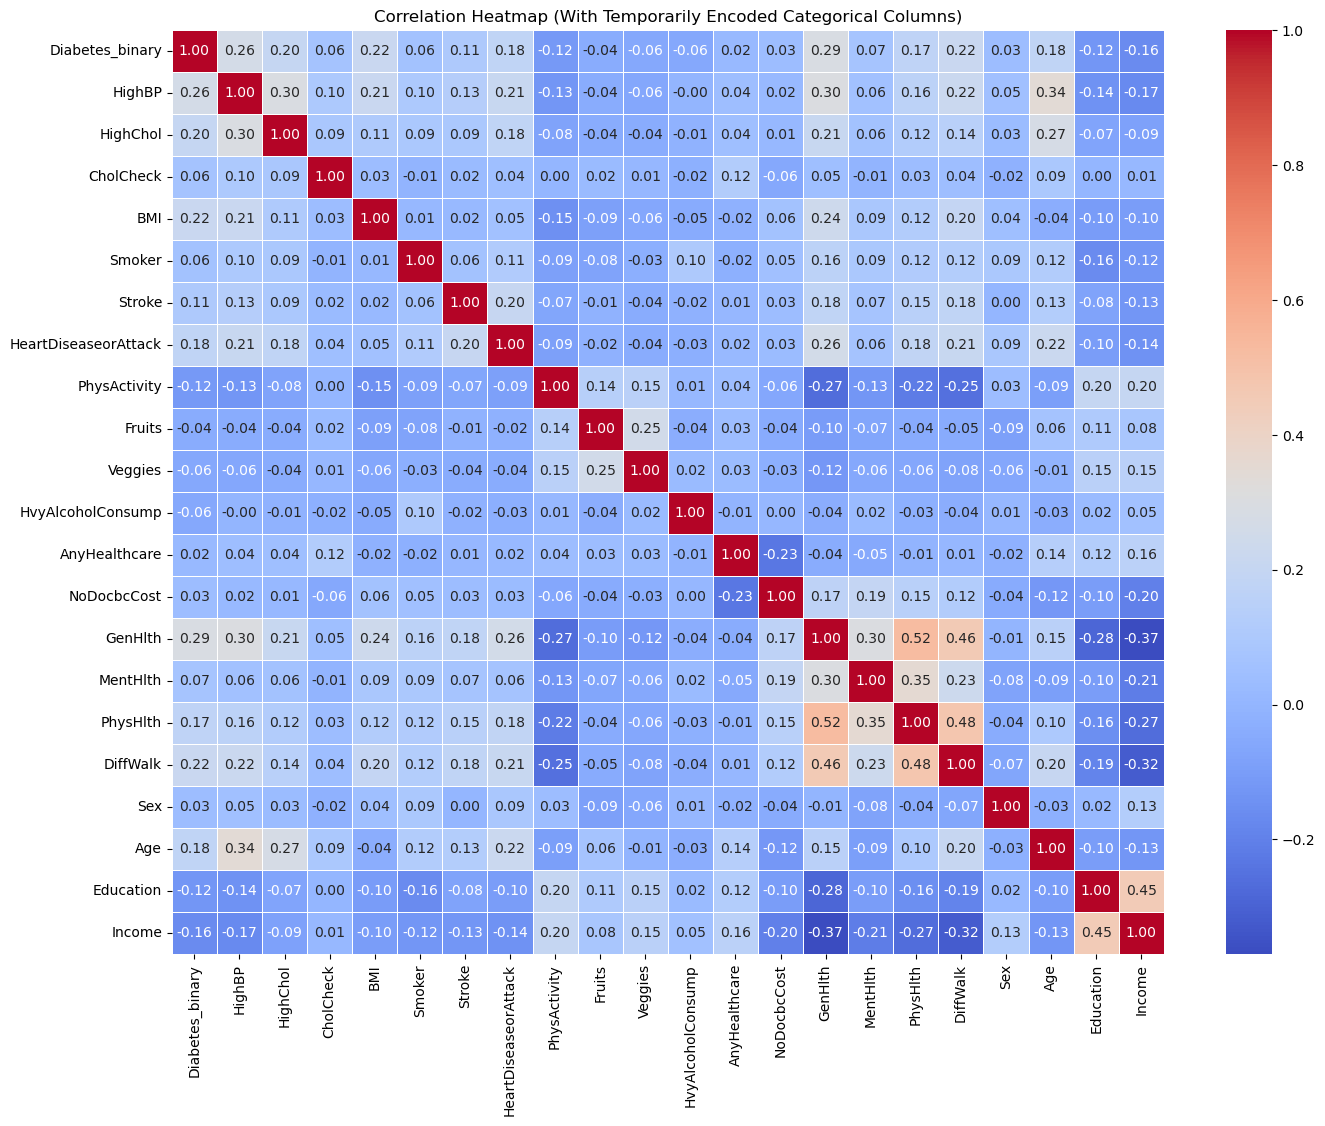

Top Correlated Column Pairs:
     Feature 1 Feature 2  Correlation
324    GenHlth  PhysHlth     0.524364
369   PhysHlth  DiffWalk     0.478417
388   DiffWalk   GenHlth     0.456920
461  Education    Income     0.449106
476     Income   GenHlth    -0.370014
346   MentHlth  PhysHlth     0.353619
419        Age    HighBP     0.344452
479     Income  DiffWalk    -0.320124
323    GenHlth  MentHlth     0.301674
309    GenHlth    HighBP     0.300530


In [39]:
df_temp = diabetes.copy()

correlation_matrix = df_temp.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (With Temporarily Encoded Categorical Columns)")
plt.show()

correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

correlation_pairs = correlation_pairs[correlation_pairs['Feature 1'] != correlation_pairs['Feature 2']]
correlation_pairs = correlation_pairs.reindex(correlation_pairs['Correlation'].abs().sort_values(ascending=False).index)

correlation_pairs = correlation_pairs.iloc[::2]

print("Top Correlated Column Pairs:")
print(correlation_pairs.head(10)) 


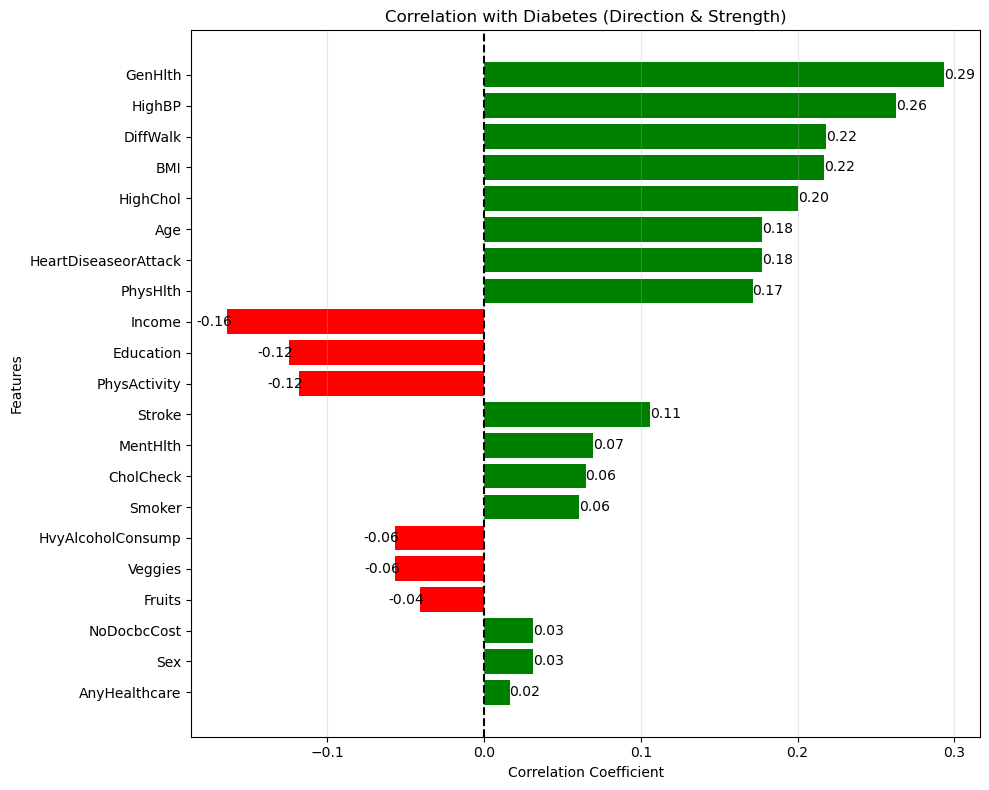

Correlation with Grades:
AnyHealthcare           0.016255
Sex                     0.031430
NoDocbcCost             0.031433
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
Smoker                  0.060789
CholCheck               0.064761
MentHlth                0.069315
Stroke                  0.105816
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
PhysHlth                0.171337
HeartDiseaseorAttack    0.177282
Age                     0.177442
HighChol                0.200276
BMI                     0.216843
DiffWalk                0.218344
HighBP                  0.263129
GenHlth                 0.293569
Name: Diabetes_binary, dtype: float64


In [40]:
diabetes_corr = correlation_matrix['Diabetes_binary'].drop('Diabetes_binary')
diabetes_corr = diabetes_corr.reindex(diabetes_corr.abs().sort_values().index)

plt.figure(figsize=(10, 8))
bars = plt.barh(diabetes_corr.index, diabetes_corr.values, 
                color=np.where(diabetes_corr.values >= 0, 'green', 'red'))

for bar in bars:
    width = bar.get_width()
    plt.text(width if width >=0 else width - 0.02,
             bar.get_y() + bar.get_height()/2,
             f'{width:.2f}',
             va='center')

plt.axvline(0, color='black', linestyle='--')
plt.title("Correlation with Diabetes (Direction & Strength)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Correlation with Grades:")
print(diabetes_corr)


Feature 'BMI' has 9847 outliers.
Feature 'GenHlth' has 12081 outliers.
Feature 'MentHlth' has 36208 outliers.
Feature 'PhysHlth' has 40949 outliers.
Feature 'Age' has 0 outliers.
Feature 'Education' has 0 outliers.
Feature 'Income' has 0 outliers.


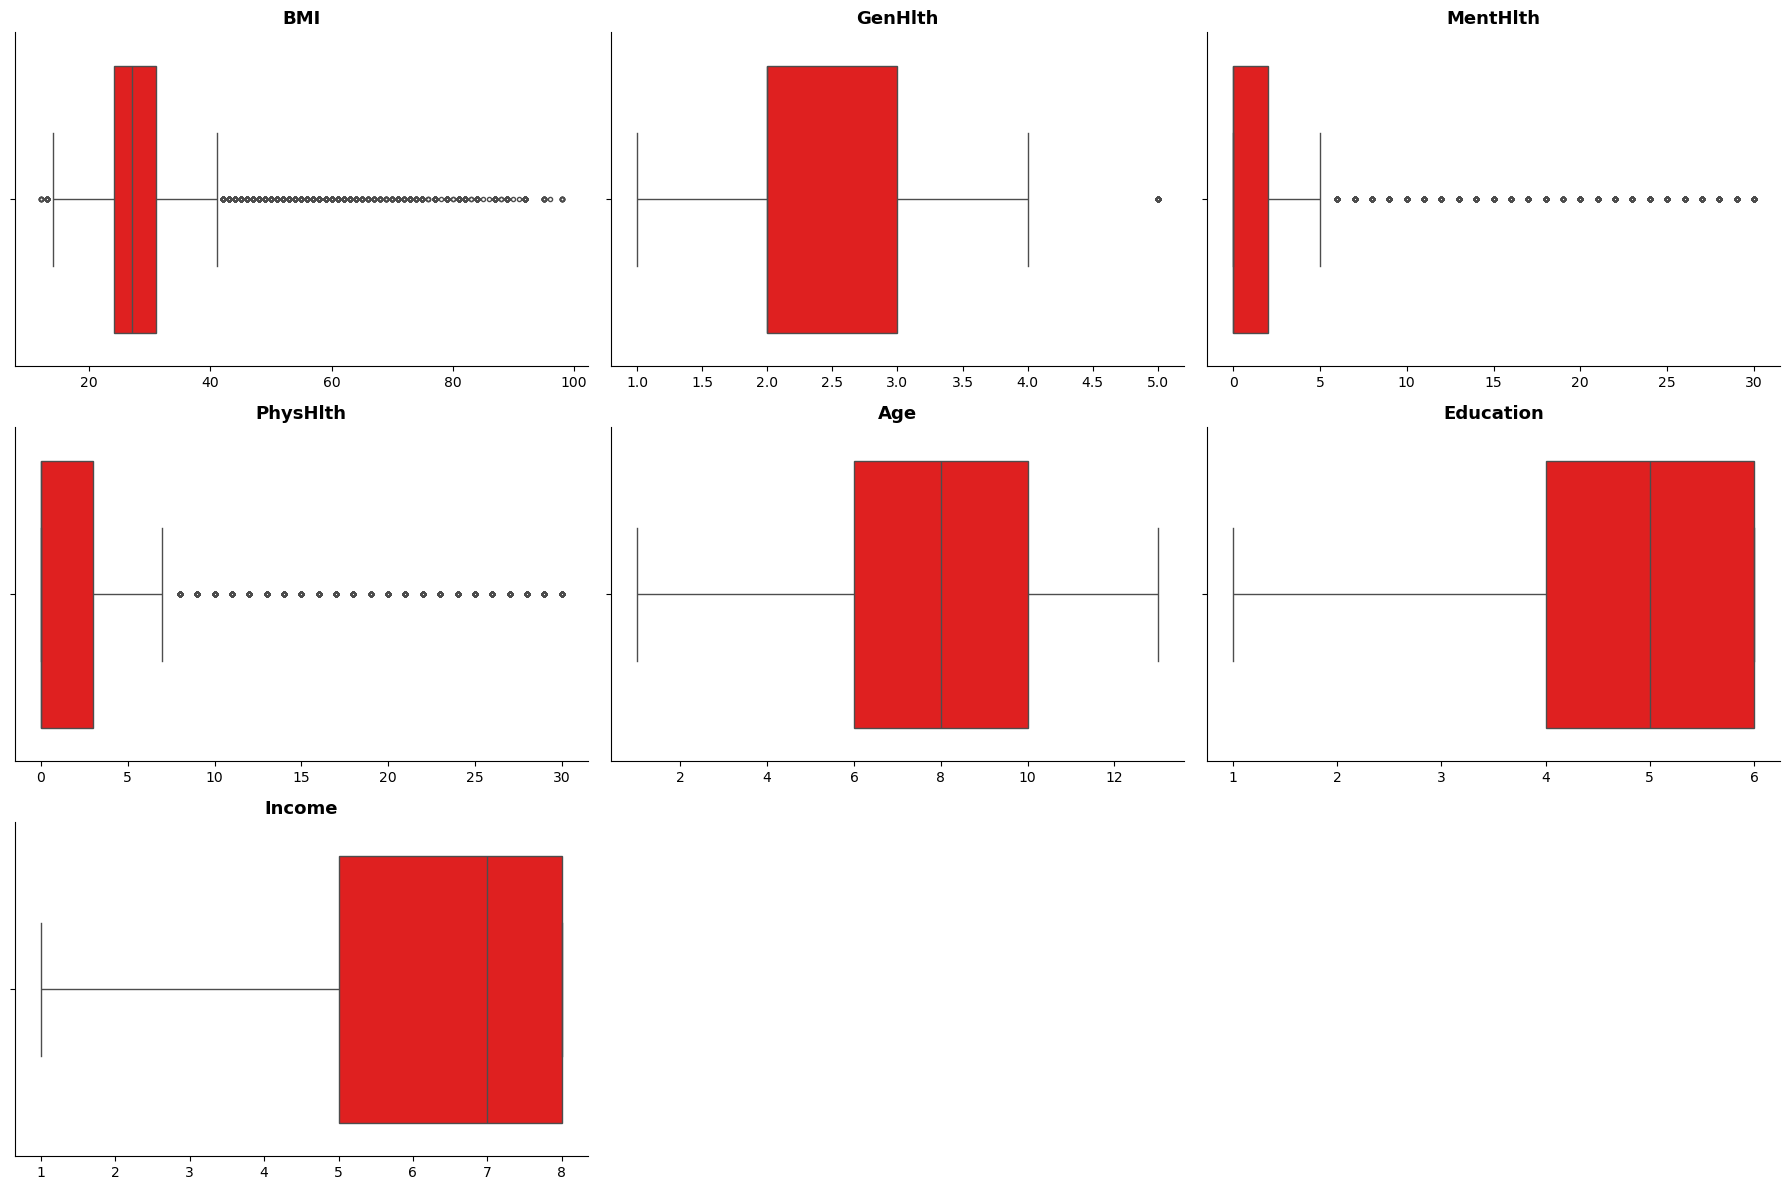

In [44]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numeric_cols = [col for col in diabetes.select_dtypes(include=['float64', 'int64']).columns if diabetes[col].nunique() > 2]

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  #
plt.figure(figsize=(n_cols * 6, n_rows * 4))

for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(x=diabetes[col], color='red', fliersize=3)
    plt.title(f'{col}', fontsize=13, fontweight='bold')
    plt.xlabel('')
    outliers = detect_outliers_iqr(diabetes, col)
    print(f"Feature '{col}' has {len(outliers)} outliers.")

plt.tight_layout()
sns.despine()
plt.show()
